### Student Information
Name: Elona Shatri

Student ID: 106065429

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta


# 1. Data source 

In this notebook we will explore 3 datasets of website reviews. The dataset is made of three datasets for each website "yelp_labelled", "imdb_labelled" and "amazon_cells_labelled" For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. The selected sentences have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

   A short description of the dataset, provided by the authors, is provided below:

"For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger       datasets of reviews. We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected."




# 2. Data Preparation 

Now let us begin to explore the data. 

In this demonstration I am only going to look at 2 categories. 

In [3]:
# categories
# bad = 0, good = 1
categories = ['good', 'bad']

Here I parse the dosument that contains the data from the three datasets.

In [4]:
X = pd.read_csv("sentiment labelled sentences/dataset3.txt", delimiter="|", names=['source','sentence','score'],  encoding='latin-1')



Here I determine the data type of the score attribute as int64.

In [5]:
X['score'] = X['score'].astype('int64')

Just to make sure I have all the records from the dataset, I will use len(). 

In [6]:
len(X)

3000

Once again to reassure that everything is okay with the records I will use the count.

In [7]:
cnt = X.count
print (cnt)

<bound method DataFrame.count of             source                                           sentence  score
0     amazon_cells  So there is no way for me to plug it in here i...      0
1     amazon_cells                        Good case, Excellent value.      1
2     amazon_cells                             Great for the jawbone.      1
3     amazon_cells  Tied to charger for conversations lasting more...      0
4     amazon_cells                                  The mic is great.      1
5     amazon_cells  I have to jiggle the plug to get it to line up...      0
6     amazon_cells  If you have several dozen or several hundred c...      0
7     amazon_cells        If you are Razr owner...you must have this!      1
8     amazon_cells                Needless to say, I wasted my money.      0
9     amazon_cells                   What a waste of money and time!.      0
10    amazon_cells                    And the sound quality is great.      1
11    amazon_cells  He was very impressed w

I will print the first 10 records from the dataset.

In [8]:
X[0:10]

source                                           sentence  score
0  amazon_cells  So there is no way for me to plug it in here i...      0
1  amazon_cells                        Good case, Excellent value.      1
2  amazon_cells                             Great for the jawbone.      1
3  amazon_cells  Tied to charger for conversations lasting more...      0
4  amazon_cells                                  The mic is great.      1
5  amazon_cells  I have to jiggle the plug to get it to line up...      0
6  amazon_cells  If you have several dozen or several hundred c...      0
7  amazon_cells        If you are Razr owner...you must have this!      1
8  amazon_cells                Needless to say, I wasted my money.      0
9  amazon_cells                   What a waste of money and time!.      0

I will make sure that each attribute has it's corresponding data type.

In [9]:
X.dtypes

source      object
sentence    object
score        int64
dtype: object

# 3. Data

In this section I will try to make the data to look more understandable.

# 3.1. Converting dataset into Pandas dataframe¶

In the first step I will print the whole table.

In [10]:
print(X)

            source                                           sentence  score
0     amazon_cells  So there is no way for me to plug it in here i...      0
1     amazon_cells                        Good case, Excellent value.      1
2     amazon_cells                             Great for the jawbone.      1
3     amazon_cells  Tied to charger for conversations lasting more...      0
4     amazon_cells                                  The mic is great.      1
5     amazon_cells  I have to jiggle the plug to get it to line up...      0
6     amazon_cells  If you have several dozen or several hundred c...      0
7     amazon_cells        If you are Razr owner...you must have this!      1
8     amazon_cells                Needless to say, I wasted my money.      0
9     amazon_cells                   What a waste of money and time!.      0
10    amazon_cells                    And the sound quality is great.      1
11    amazon_cells  He was very impressed when going from the orig...      1

Prints the first 5 records

In [11]:
X[0:5]

source                                           sentence  score
0  amazon_cells  So there is no way for me to plug it in here i...      0
1  amazon_cells                        Good case, Excellent value.      1
2  amazon_cells                             Great for the jawbone.      1
3  amazon_cells  Tied to charger for conversations lasting more...      0
4  amazon_cells                                  The mic is great.      1

Prints the first 5 records without having to tell the range

In [12]:
X.head(5) 

source                                           sentence  score
0  amazon_cells  So there is no way for me to plug it in here i...      0
1  amazon_cells                        Good case, Excellent value.      1
2  amazon_cells                             Great for the jawbone.      1
3  amazon_cells  Tied to charger for conversations lasting more...      0
4  amazon_cells                                  The mic is great.      1

Prints the last 5 records

In [13]:
X.tail(5)

source                                           sentence  score
2995   yelp  I think food should have flavor and texture an...      0
2996   yelp                           Appetite instantly gone.      0
2997   yelp  Overall I was not impressed and would not go b...      0
2998   yelp  The whole experience was underwhelming, and I ...      0
2999   yelp  Then, as if I hadn't wasted enough of my life ...      0

Prints records in a range

In [14]:
X[1050:1055]

source                                           sentence  score
1050   imdb  I'm glad the film didn't go for the most obvio...      1
1051   imdb  In addition to having one of the most lovely s...      1
1052   imdb  It's hard not to fall head-over-heels in love ...      1
1053   imdb  On the negative, it's insipid enough to cause ...      0
1054   imdb                       Long, whiny and pointless.        0

# 3.1 Familiarizing yourself with the Data

Take the first 8 results from the score column only

In [15]:
X[0:8][["score"]]

score
0      0
1      1
2      1
3      0
4      1
5      0
6      0
7      1

Take the last 10 last records and display the sentences only

In [16]:
X[-11:-1][["sentence"]]

sentence
2989  I would avoid this place if you are staying in...
2990  The refried beans that came with my meal were ...
2991         Spend your money and time some place else.
2992  A lady at the table next to us found a live gr...
2993            the presentation of the food was awful.
2994           I can't tell you how disappointed I was.
2995  I think food should have flavor and texture an...
2996                           Appetite instantly gone.
2997  Overall I was not impressed and would not go b...
2998  The whole experience was underwhelming, and I ...

Take 100 records, every twentieth, till the record number is 100.

In [17]:
X.iloc[::20, :][0:100]

source                                           sentence  score
0     amazon_cells  So there is no way for me to plug it in here i...      0
20    amazon_cells  I went on Motorola's website and followed all ...      0
40    amazon_cells  It has a great camera thats 2MP, and the pics ...      1
60    amazon_cells  Essentially you can forget Microsoft's tech su...      0
80    amazon_cells      I wear it everyday and it holds up very well.      1
100   amazon_cells  Integrated seamlessly with the Motorola RAZR p...      1
120   amazon_cells  I've tried several different earpieces for my ...      1
140   amazon_cells                                      What a waste.      0
160   amazon_cells  All I can do is whine on the Internet, so here...      0
180   amazon_cells                            Don't buy this product.      0
200   amazon_cells  The color is even prettier than I thought it w...      1
220   amazon_cells                               Freezes frequently4.      0
240   amazon_cells             Big Disappointment with calendar sync.      0
260   amazon_cells                   Good product - incredible value.      1
280   amazon_cells                         Good product, good seller.      1
300   amazon_cells                                   Sending it back.      0
320   amazon_cells               I am also very happy with the price.      1
340   amazon_cells                           Excellent sound quality.      1
360   amazon_cells                           Nice design and quality.      1
380   amazon_cells                           Great Hands Free Device.      1
400   amazon_cells                              what a disappointment      0
420   amazon_cells                                 Price is good too.      1
440   amazon_cells                                   Very Displeased.      0
460   amazon_cells                                BT50 battery junk!.      0
480   amazon_cells  The keyboard is really worthwhile in usefulnes...      1
500   amazon_cells  The bose noise cancelling is amazing, which is...      1
520   amazon_cells  My only complaint is the standard sound volume...      0
540   amazon_cells                          I am glad I purchased it.      1
560   amazon_cells  Muddy, low quality sound, and the casing aroun...      0
580   amazon_cells  It works great with a car charger, especially ...      1
...            ...                                                ...    ...
1400          imdb  A good commentary of today's love and undoubte...      1
1420          imdb                                    It just blew.        0
1440          imdb         Both do good jobs and are quite amusing.        1
1460          imdb  I know he was a contract player with little co...      0
1480          imdb  The acting by the whole cast could be put on a...      0
1500          imdb  The entire audience applauded at the conclusio...      1
1520          imdb           It is zillion times away from reality.        0
1540          imdb  STEAMBOAT WILLIE is an amazingly important fil...      1
1560          imdb  Director Paul Matthews, who also wrote/directe...      0
1580          imdb  This was reflected not only in the cast, but a...      0
1600          imdb  Perabo has a nice energy level and is obviousl...      1
1620          imdb  This is a masterful piece of film-making, with...      1
1640          imdb             But it is entertaining, nonetheless.        1
1660          imdb  This is a witty and delightful adaptation of t...      1
1680          imdb   It was also the right balance of war and love.        1
1700          imdb  It is a film about nothing, just a pretext to ...      0
1720          imdb  That's how I'd describe this painfully dreary ...      0
1740          imdb         I just saw this film and I recommend it.        1
1760          imdb  Technically, the film is well made with impres...      1
1780          imdb  The plot is nonsense that doesn't interest in ...      0
1800    

Take 30 records for the hundredth record, since the datset has data from three different sources that means that we are taking 10 records for each source.

In [18]:
X.iloc[::100, :][0:30]

source                                           sentence  score
0     amazon_cells  So there is no way for me to plug it in here i...      0
100   amazon_cells  Integrated seamlessly with the Motorola RAZR p...      1
200   amazon_cells  The color is even prettier than I thought it w...      1
300   amazon_cells                                   Sending it back.      0
400   amazon_cells                              what a disappointment      0
500   amazon_cells  The bose noise cancelling is amazing, which is...      1
600   amazon_cells  Their Research and Development division obviou...      1
700   amazon_cells  Also, the phone doesn't seem to accept anythin...      0
800   amazon_cells                                 Good , works fine.      1
900   amazon_cells  This was utterly confusing at first, which cau...      0
1000          imdb  A very, very, very slow-moving, aimless movie ...      0
1100          imdb          I don't think you will be disappointed.        1
1200          imdb          This is definitely one of the bad ones.        0
1300          imdb  I recommend this for EVERYONE who loves film, ...      1
1400          imdb  A good commentary of today's love and undoubte...      1
1500          imdb  The entire audience applauded at the conclusio...      1
1600          imdb  Perabo has a nice energy level and is obviousl...      1
1700          imdb  It is a film about nothing, just a pretext to ...      0
1800          imdb  In fact, this stinker smells like a direct-to-...      0
1900          imdb   Otherwise, don't even waste your time on this.        0
2000          yelp                           Wow... Loved this place.      1
2100          yelp  Our server was fantastic and when he found out...      1
2200          yelp  I had heard good things about this place, but ...      1
2300          yelp  Good beer & drink selection and good food sele...      1
2400          yelp               This one is simply a disappointment.      0
2500          yelp  I also had to taste my Mom's multi-grain pumpk...      1
2600          yelp   I miss it and wish they had one in Philadelphia!      1
2700          yelp  The chips that came out were dripping with gre...      0
2800          yelp                                   I'm super pissd.      0
2900          yelp                        Spend your money elsewhere.      0

Display only the records which have a positive review or score=1

In [19]:
X.loc[X['score'] == 1] 

source                                           sentence  score
1     amazon_cells                        Good case, Excellent value.      1
2     amazon_cells                             Great for the jawbone.      1
4     amazon_cells                                  The mic is great.      1
7     amazon_cells        If you are Razr owner...you must have this!      1
10    amazon_cells                    And the sound quality is great.      1
11    amazon_cells  He was very impressed when going from the orig...      1
13    amazon_cells                           Very good quality though      1
15    amazon_cells  Highly recommend for any one who has a blue to...      1
17    amazon_cells                                   So Far So Good!.      1
18    amazon_cells                                      Works great!.      1
21    amazon_cells  I bought this to use with my Kindle Fire and a...      1
23    amazon_cells  I have yet to run this new battery below two b...      1
25    amazon_cells               Great Pocket PC / phone combination.      1
26    amazon_cells  I've owned this phone for 7 months now and can...      1
31    amazon_cells  This product is ideal for people like me whose...      1
34    amazon_cells  Car charger as well as AC charger are included...      1
36    amazon_cells                          It has kept up very well.      1
38    amazon_cells     The case is great and works fine with the 680.      1
40    amazon_cells  It has a great camera thats 2MP, and the pics ...      1
42    amazon_cells                         Nice headset priced right.      1
44    amazon_cells                       Excellent bluetooth headset.      1
45    amazon_cells                     It has all the features I want      1
48    amazon_cells                         This case seems well made.      1
51    amazon_cells  good protection and does not make phone too bu...      1
52    amazon_cells  A usable keyboard actually turns a PDA into a ...      1
53    amazon_cells  This phone is pretty sturdy and I've never had...      1
54    amazon_cells                                 I love this thing!      1
55    amazon_cells  Everything about it is fine and reasonable for...      1
57    amazon_cells  I even dropped this phone into a stream and it...      1
58    amazon_cells  I have been very happy with the 510 and have h...      1
...            ...                                                ...    ...
2850          yelp    the potatoes were great and so was the biscuit.      1
2852          yelp  So flavorful and has just the perfect amount o...      1
2853          yelp  The price is reasonable and the service is great.      1
2856          yelp       Went in for happy hour, great list of wines.      1
2857          yelp  Some may say this buffet is pricey but I think...      1
2860          yelp  This place is pretty good, nice little vibe in...      1
2861          yelp  Talk about great customer service of course we...      1
2863          yelp                I love their fries and their beans.      1
2864          yelp                Always a pleasure dealing with him.      1
2865          yelp  They have a plethora of salads and sandwiches,...      1
2866          yelp  This place is awesome if you want something li...      1
2867          yelp   For sushi on the Strip, this is the place to go.      1
2868          yelp  The service was great, even the manager came a...      1
2872          yelp  All in all an excellent restaurant highlighted...      1
2873          yelp  My boyfriend and i sat at the bar and had a co...      1
2877          yelp                             Go To Place for Gyros.      1
2878          yelp  I love the owner/chef, his one authentic Japan...      1
2882          yelp                   We definately enjoyed ourselves.      1
2888          yelp                   Seriously killer hot chai latte.      1
2890          yelp  My boyfriend tried the Mediterranean Chicken S...      1
2891    

I will group good or positive reviews in one group and tell it's size and one group for the negative reviews and it's size

In [20]:
X.groupby(['score']).size()

score
0    1500
1    1500
dtype: int64

Here I'll insert a query that makes no sense, since am looking for the score to be both 0 and 1 at the same time and then give us the sentence, therefore the sentence has no result. 

In [21]:
X.loc[(X["score"]== 1)
         & (X["score"]== 0) 
         , ["sentence"]]

Empty DataFrame
Columns: [sentence]
Index: []

Take the postive reviews from yelp and displaying the sentence only

In [22]:
X.loc[(X["source"]=="yelp")
         & (X["score"]== 1) 
         , ["sentence"]]



sentence
2000                           Wow... Loved this place.
2003  Stopped by during the late May bank holiday of...
2004  The selection on the menu was great and so wer...
2008                          The fries were great too.
2009                                     A great touch.
2010                           Service was very prompt.
2013  I tried the Cape Cod ravoli, chicken,with cran...
2016                                Highly recommended.
2021                                 The food, amazing.
2022                              Service is also cute.
2023  I could care less... The interior is just beau...
2024                                 So they performed.
2025  That's right....the red velvet cake.....ohhh t...
2027  This hole in the wall has great Mexican street...
2030  Also there are combos like a burger, fries, an...
2032  I found this place by accident and I could not...
2034                  Overall, I like this place a lot.
2035  The only redeeming quality of the restaurant w...
2036                    Ample portions and good prices.
2038              My first visit to Hiro was a delight!
2040                       The shrimp tender and moist.
2043  On a positive note, our server was very attent...
2045  The only thing I did like was the prime rib an...
2047        The burger is good beef, cooked just right.
2048  If you want a sandwich just go to any Firehous...
2049  My side Greek salad with the Greek dressing wa...
2050  We ordered the duck rare and it was pink and t...
2051  He came running after us when he realized my h...
2052                        Their chow mein is so good!
2054                              The portion was huge!
...                                                 ...
2850    the potatoes were great and so was the biscuit.
2852  So flavorful and has just the perfect amount o...
2853  The price is reasonable and the service is great.
2856       Went in for happy hour, great list of wines.
2857  Some may say this buffet is pricey but I think...
2860  This place is pretty good, nice little vibe in...
2861  Talk about great customer service of course we...
2863                I love their fries and their beans.
2864                Always a pleasure dealing with him.
2865  They have a plethora of salads and sandwiches,...
2866  This place is awesome if you want something li...
2867   For sushi on the Strip, this is the place to go.
2868  The service was great, even the manager came a...
2872  All in all an excellent restaurant highlighted...
2873  My boyfriend and i sat at the bar and had a co...
2877                             Go To Place for Gyros.
2878  I love the owner/chef, his one authentic Japan...
2882                   We definately enjoyed ourselves.
2888                   Seriously killer hot chai latte.
2890  My boyfriend tried the Mediterranean Chicken S...
2891  Their rotating beers on tap is also a highligh...
2894  If you stay in Vegas you must get breakfast he...
2895  I want to first say our server was great and w...
2896                     The pizza selections are good.
2897              I had strawberry tea, which was good.
2899                       Overall, a great experience.
2901  Their regular toasted bread was equally satisf...
2907  The chips and sals a here is amazing!!!!!!!!!!...
2909              This is my new fav Vegas buffet spot.
2922  Every time I eat here, I see caring teamwork t...

[500 rows x 1 columns]

# 4. Data Mining using Pandas

Here I will try to get in work all the things I've learned so far from the theorytical course in data mining.

# 4.1. Dealing with missing values


First I will check if there is any missing values. We can do that easily by using the following built-in function provided by Pandas. If true for a field means that there is a missing value.

In [23]:
X.isnull()

source  sentence  score
0      False     False  False
1      False     False  False
2      False     False  False
3      False     False  False
4      False     False  False
5      False     False  False
6      False     False  False
7      False     False  False
8      False     False  False
9      False     False  False
10     False     False  False
11     False     False  False
12     False     False  False
13     False     False  False
14     False     False  False
15     False     False  False
16     False     False  False
17     False     False  False
18     False     False  False
19     False     False  False
20     False     False  False
21     False     False  False
22     False     False  False
23     False     False  False
24     False     False  False
25     False     False  False
26     False     False  False
27     False     False  False
28     False     False  False
29     False     False  False
...      ...       ...    ...
2970   False     False  False
2971   False     False  False
2972   False     False  False
2973   False     False  False
2974   False     False  False
2975   False     False  False
2976   False     False  False
2977   False     False  False
2978   False     False  False
2979   False     False  False
2980   False     False  False
2981   False     False  False
2982   False     False  False
2983   False     False  False
2984   False     False  False
2985   False     False  False
2986   False     False  False
2987   False     False  False
2988   False     False  False
2989   False     False  False
2990   False     False  False
2991   False     False  False
2992   False     False  False
2993   False     False  False
2994   False     False  False
2995   False     False  False
2996   False     False  False
2997   False     False  False
2998   False     False  False
2999   False     False  False

[3000 rows x 3 columns]

With the help of the dmh we can see the result as the amount of the missing records, it looks for missing values in an attribute

In [24]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

source      (The amount of missing records is: , 0)
sentence    (The amount of missing records is: , 0)
score       (The amount of missing records is: , 0)
dtype: object

Let's us know the total or the sum of the missing values for each attribute

In [25]:
X.isnull().sum()

source      0
sentence    0
score       0
dtype: int64

Checking for a missing values for each record and the result its an amount.

In [26]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amount of missing records is: , 0)
1       (The amount of missing records is: , 0)
2       (The amount of missing records is: , 0)
3       (The amount of missing records is: , 0)
4       (The amount of missing records is: , 0)
5       (The amount of missing records is: , 0)
6       (The amount of missing records is: , 0)
7       (The amount of missing records is: , 0)
8       (The amount of missing records is: , 0)
9       (The amount of missing records is: , 0)
10      (The amount of missing records is: , 0)
11      (The amount of missing records is: , 0)
12      (The amount of missing records is: , 0)
13      (The amount of missing records is: , 0)
14      (The amount of missing records is: , 0)
15      (The amount of missing records is: , 0)
16      (The amount of missing records is: , 0)
17      (The amount of missing records is: , 0)
18      (The amount of missing records is: , 0)
19      (The amount of missing records is: , 0)
20      (The amount of missing records i

A simplier look of it without the dmh help.

In [27]:
X.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2970    0
2971    0
2972    0
2973    0
2974    0
2975    0
2976    0
2977    0
2978    0
2979    0
2980    0
2981    0
2982    0
2983    0
2984    0
2985    0
2986    0
2987    0
2988    0
2989    0
2990    0
2991    0
2992    0
2993    0
2994    0
2995    0
2996    0
2997    0
2998    0
2999    0
Length: 3000, dtype: int64

# 4.1.1. Inserting dummy data


Here I will insert dummy data into the dataframe so I can have the missing values.

In [28]:
dummy_series = pd.Series(["dummy_record", 1], index=["source", "sentence"])

In [29]:
dummy_series

source      dummy_record
sentence               1
dtype: object

In [30]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [31]:
# check if the records was commited into result
len(result_with_series)

3001

Now we that I have added the record (specifically a Series or what we would usually now as lists) with some missing values.I will try the function and see if it can detect that there is a missing value on the resulting dataframe called.


In [32]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

source      (The amount of missing records is: , 0)
sentence    (The amount of missing records is: , 0)
score       (The amount of missing records is: , 1)
dtype: object

Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the cscore attribute. I will try to insert it into our original dataframe X. Notice also that we are not changing the X dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to X and assign it to itself as we will do below. 

In [33]:
dummy_dict = [{'source': 'dummy_record',
               'sentence': 1
              }]

In [34]:
X = X.append(dummy_dict,ignore_index=True)

In [35]:
len(X)

3001

In [36]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

source      (The amount of missing records is: , 0)
sentence    (The amount of missing records is: , 0)
score       (The amount of missing records is: , 1)
dtype: object

So now that we can see that our data has missing values, I will remove the records with missing values.


In [37]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [38]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

source      (The amount of missing records is: , 0)
sentence    (The amount of missing records is: , 0)
score       (The amount of missing records is: , 0)
dtype: object

In [39]:
len(X)

3000

And we are back with our original dataset, clean and tidy as we want it.

# 4.2 Dealing with duplicate data

First let me check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates.


In [40]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

We can also check the sum of duplicated by simply doing:

In [41]:
sum(X.duplicated())

17

Based on that output, you may be asking why did the duplicated operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the operation does is to check per records instead of per column. That is why the operation only returns on value instead of two values for each columns, for each record as before. It appears that we have 17 duplicates. If we want to check for duplicates as we did above for some particular columns instead of all columns we do something as below. As you may have noticed, in this case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicateS by only the text.

In [42]:
sum(X.duplicated('sentence'))

17

In [43]:
sum(X.duplicated('source'))

2997

Since there are only three sources, which means, there are only 3 originals and the other are duplivcates of those, from 3000-3=2997, which means the other 2997 are duplicates.

In [44]:
sum(X.duplicated('score'))

2998

Since there are only two kinds of scores 0 and 1, which means, from 3000-2=2998, which means the other 2998 are duplicates.

In [45]:
pd.concat(g for _, g in X.groupby("sentence") if len(g) > 1)


source                                           sentence  score
1125          imdb                                            10/10      1.0
1788          imdb                                            10/10      1.0
1090          imdb                   Definitely worth checking out.      1.0
1363          imdb                   Definitely worth checking out.      1.0
446   amazon_cells                                      Does not fit.    0.0
748   amazon_cells                                      Does not fit.    0.0
180   amazon_cells                            Don't buy this product.    0.0
543   amazon_cells                            Don't buy this product.    0.0
402   amazon_cells                   Excellent product for the price.    1.0
892   amazon_cells                   Excellent product for the price.    1.0
290   amazon_cells                                       Great Phone.    1.0
792   amazon_cells                                       Great Phone.    1.0
187   amazon_cells                                      Great phone!.    1.0
285   amazon_cells                                      Great phone!.    1.0
647   amazon_cells                                       Great phone.    1.0
896   amazon_cells                                       Great phone.    1.0
2334          yelp                                 I love this place.    1.0
2814          yelp                                 I love this place.    1.0
2380          yelp                                   I won't be back.    0.0
2843          yelp                                   I won't be back.    0.0
2505          yelp                  I would not recommend this place.    0.0
2846          yelp                  I would not recommend this place.    0.0
179   amazon_cells  If you like a loud buzzing to override all you...    0.0
744   amazon_cells  If you like a loud buzzing to override all you...    0.0
1572          imdb                                 Not recommended.      0.0
1585          imdb                                 Not recommended.      0.0
2383          yelp                             The food was terrible.    0.0
2816          yelp                             The food was terrible.    0.0
392   amazon_cells                              This is a great deal.    1.0
778   amazon_cells                              This is a great deal.    1.0
18    amazon_cells                                      Works great!.    1.0
524   amazon_cells                                      Works great!.    1.0
262   amazon_cells                                       Works great.    1.0
407   amazon_cells                                       Works great.    1.0

Above we can see all the records with duplicate sentences.


Since we have 17 duplicates I will show the first ones.

In [46]:
X[X.duplicated(keep="first")]

source                                           sentence  score
285   amazon_cells                                      Great phone!.    1.0
407   amazon_cells                                       Works great.    1.0
524   amazon_cells                                      Works great!.    1.0
543   amazon_cells                            Don't buy this product.    0.0
744   amazon_cells  If you like a loud buzzing to override all you...    0.0
748   amazon_cells                                      Does not fit.    0.0
778   amazon_cells                              This is a great deal.    1.0
792   amazon_cells                                       Great Phone.    1.0
892   amazon_cells                   Excellent product for the price.    1.0
896   amazon_cells                                       Great phone.    1.0
1363          imdb                   Definitely worth checking out.      1.0
1585          imdb                                 Not recommended.      0.0
1788          imdb                                            10/10      1.0
2814          yelp                                 I love this place.    1.0
2816          yelp                             The food was terrible.    0.0
2843          yelp                                   I won't be back.    0.0
2846          yelp                  I would not recommend this place.    0.0

Here we can see all the records with duplicate sentences.

Since we have 17 duplicates I decided to keep the first ones (originals) and delete the other data that are duplicates.

In [47]:
X.drop_duplicates(keep="first", inplace=True)

I will look once again at the number of records left.

In [48]:
len(X)

2983

Seems that everything is okay, since the amount of the records left is 2983 which is 17 records less than the full dataset. Since we already have duplicate data then we do not need to add duplicate data ourselvs. 


# 5. Data preprocessing 

I will explore these things:
    
    Aggregation
    Sampling
    Dimensionality Reduction
    Feature Subset Selection
    Feature Creation
    Discretization and Binarization
    Attribute Transformation


# 5.1. Sampling

Here I select the number of samples I want to take, so I am taking 1000 samples which still is a great number compared to 3000 records I have, but still it makes a great difference in computing.

In [49]:
X_sample = X.sample(n=1000)

Show the number of the samples.

In [50]:
len(X_sample)

1000

In [69]:
X_sample.groupby("source").groups.keys()

dict_keys(['amazon_cells', 'imdb', 'yelp'])

In [70]:
list(X_sample.groupby("source"))

[('amazon_cells',
             source                                           sentence  score
  70   amazon_cells                                  Mic Doesn't work.    0.0
  621  amazon_cells                      DO NOT BUY DO NOT BUYIT SUCKS    0.0
  318  amazon_cells                              I want my money back.    0.0
  794  amazon_cells  The internet access was fine, it the rare inst...    0.0
  255  amazon_cells                          poor quality and service.    0.0
  785  amazon_cells  This allows the possibility of double booking ...    0.0
  595  amazon_cells  What possesed me to get this junk, I have no i...    0.0
  305  amazon_cells         I received it quickly and it works great!!    1.0
  520  amazon_cells  My only complaint is the standard sound volume...    0.0
  806  amazon_cells  At first I thought I was grtting a good deal a...    0.0
  517  amazon_cells  I received my orders well within the shipping ...    1.0
  391  amazon_cells  The picture resolution is

In [74]:
list(X_sample.groupby("source").size())

[348, 338, 314]

In [86]:
labels = ['Amazon','Imdb', 'Yelp']
values = list(X_sample.groupby("source").size())
colors = ['#685f74', '#ca9ce1', '#a1867f']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20, color='#fff'),
               marker=dict(colors=colors, 
                           line=dict(color='#fff', width=5)))

py.iplot([trace], filename='styled_pie_chart')

I will take a look at the distribution of categories in both the sample and original dataset and visually analyze the disparity between the two datasets. To generate some visualizations, I will  use Plotly python library. 

In [51]:
categories

['good', 'bad']

In [52]:
X_category_counts = ta.get_tokens_and_frequency(list(X.score))
X_sample_category_counts = ta.get_tokens_and_frequency(list(X_sample.score))

Here I will use the api generated key from plotly in order to be able to use the plotly.

In [53]:
py.sign_in('penestia','lukQyxcPnchBptmT5evF')

Here I will visualize the distribution of the categories.

In [59]:
py.iplot(ta.plot_word_frequency(X_category_counts, "Category distribution"))

In [82]:
list(X_sample.groupby("score").size())

[495, 505]

Sample distribution of the categories.

In [90]:
import plotly.plotly as py
import plotly.graph_objs as go


labels = ['Positive','Negative']
values = list(X_sample.groupby("score").size())
colors = ['#94d1be', '#3b413c']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20, color='#fff'),
               marker=dict(colors=colors, 
                           line=dict(color='#fff', width=6)))

py.iplot([trace], filename='styled_pie_chart')



In [61]:
py.iplot(ta.plot_word_frequency(X_sample_category_counts, "Category sample distribution"))

I also can do a side by side comparison of the distribution between the two datasets

In [62]:
list(X_category_counts[1])

[1493, 1490]

In [63]:
data = ta.plot_comp(X_category_counts, X_sample_category_counts)

py.iplot(list(data), filename='category distribution comparision')

Here I will use matplotlib to visualize the same things as I did before with plotly.

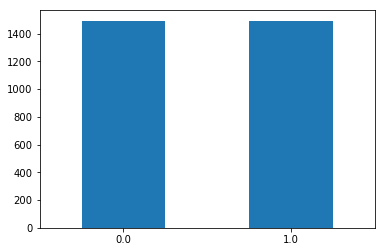

In [91]:
X.score.value_counts().plot(kind="bar", rot=0)

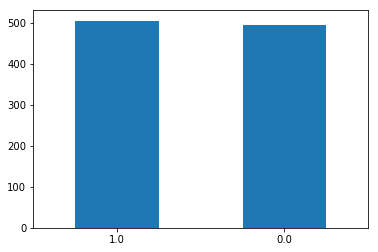

In [92]:
X_sample.score.value_counts().plot(kind="bar", rot=0)

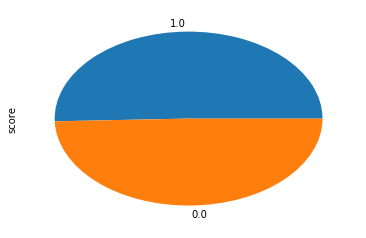

In [93]:
X_sample.score.value_counts().plot(kind="pie", rot=0)

# 5.2. Feature Creation

The goal of feature creation is to find new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to.

In [94]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [95]:
X[0:4]

source                                           sentence  score  \
0  amazon_cells  So there is no way for me to plug it in here i...    0.0   
1  amazon_cells                        Good case, Excellent value.    1.0   
2  amazon_cells                             Great for the jawbone.    1.0   
3  amazon_cells  Tied to charger for conversations lasting more...    0.0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [96]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

Here we define some of the words that do not really have any meaning in the wordcloud.

In [204]:
stopwords = set()
stopwords.add("said")
stopwords.add("|")
stopwords.add("0")
stopwords.add("1")
stopwords.add("amazon_cells")
stopwords.add("yelp")
stopwords.add("imdb")
stopwords.add("the")
stopwords.add("film")
stopwords.add("movie")
stopwords.add("place")
stopwords.add("phone")
stopwords.add("food")

Used the wordcloud to have a better visualization of the words most used in the reviews, both for the negative and positive reviews. The one with the like logo are all the positive reviews, whereas the dislike logo has all the negative reviews.

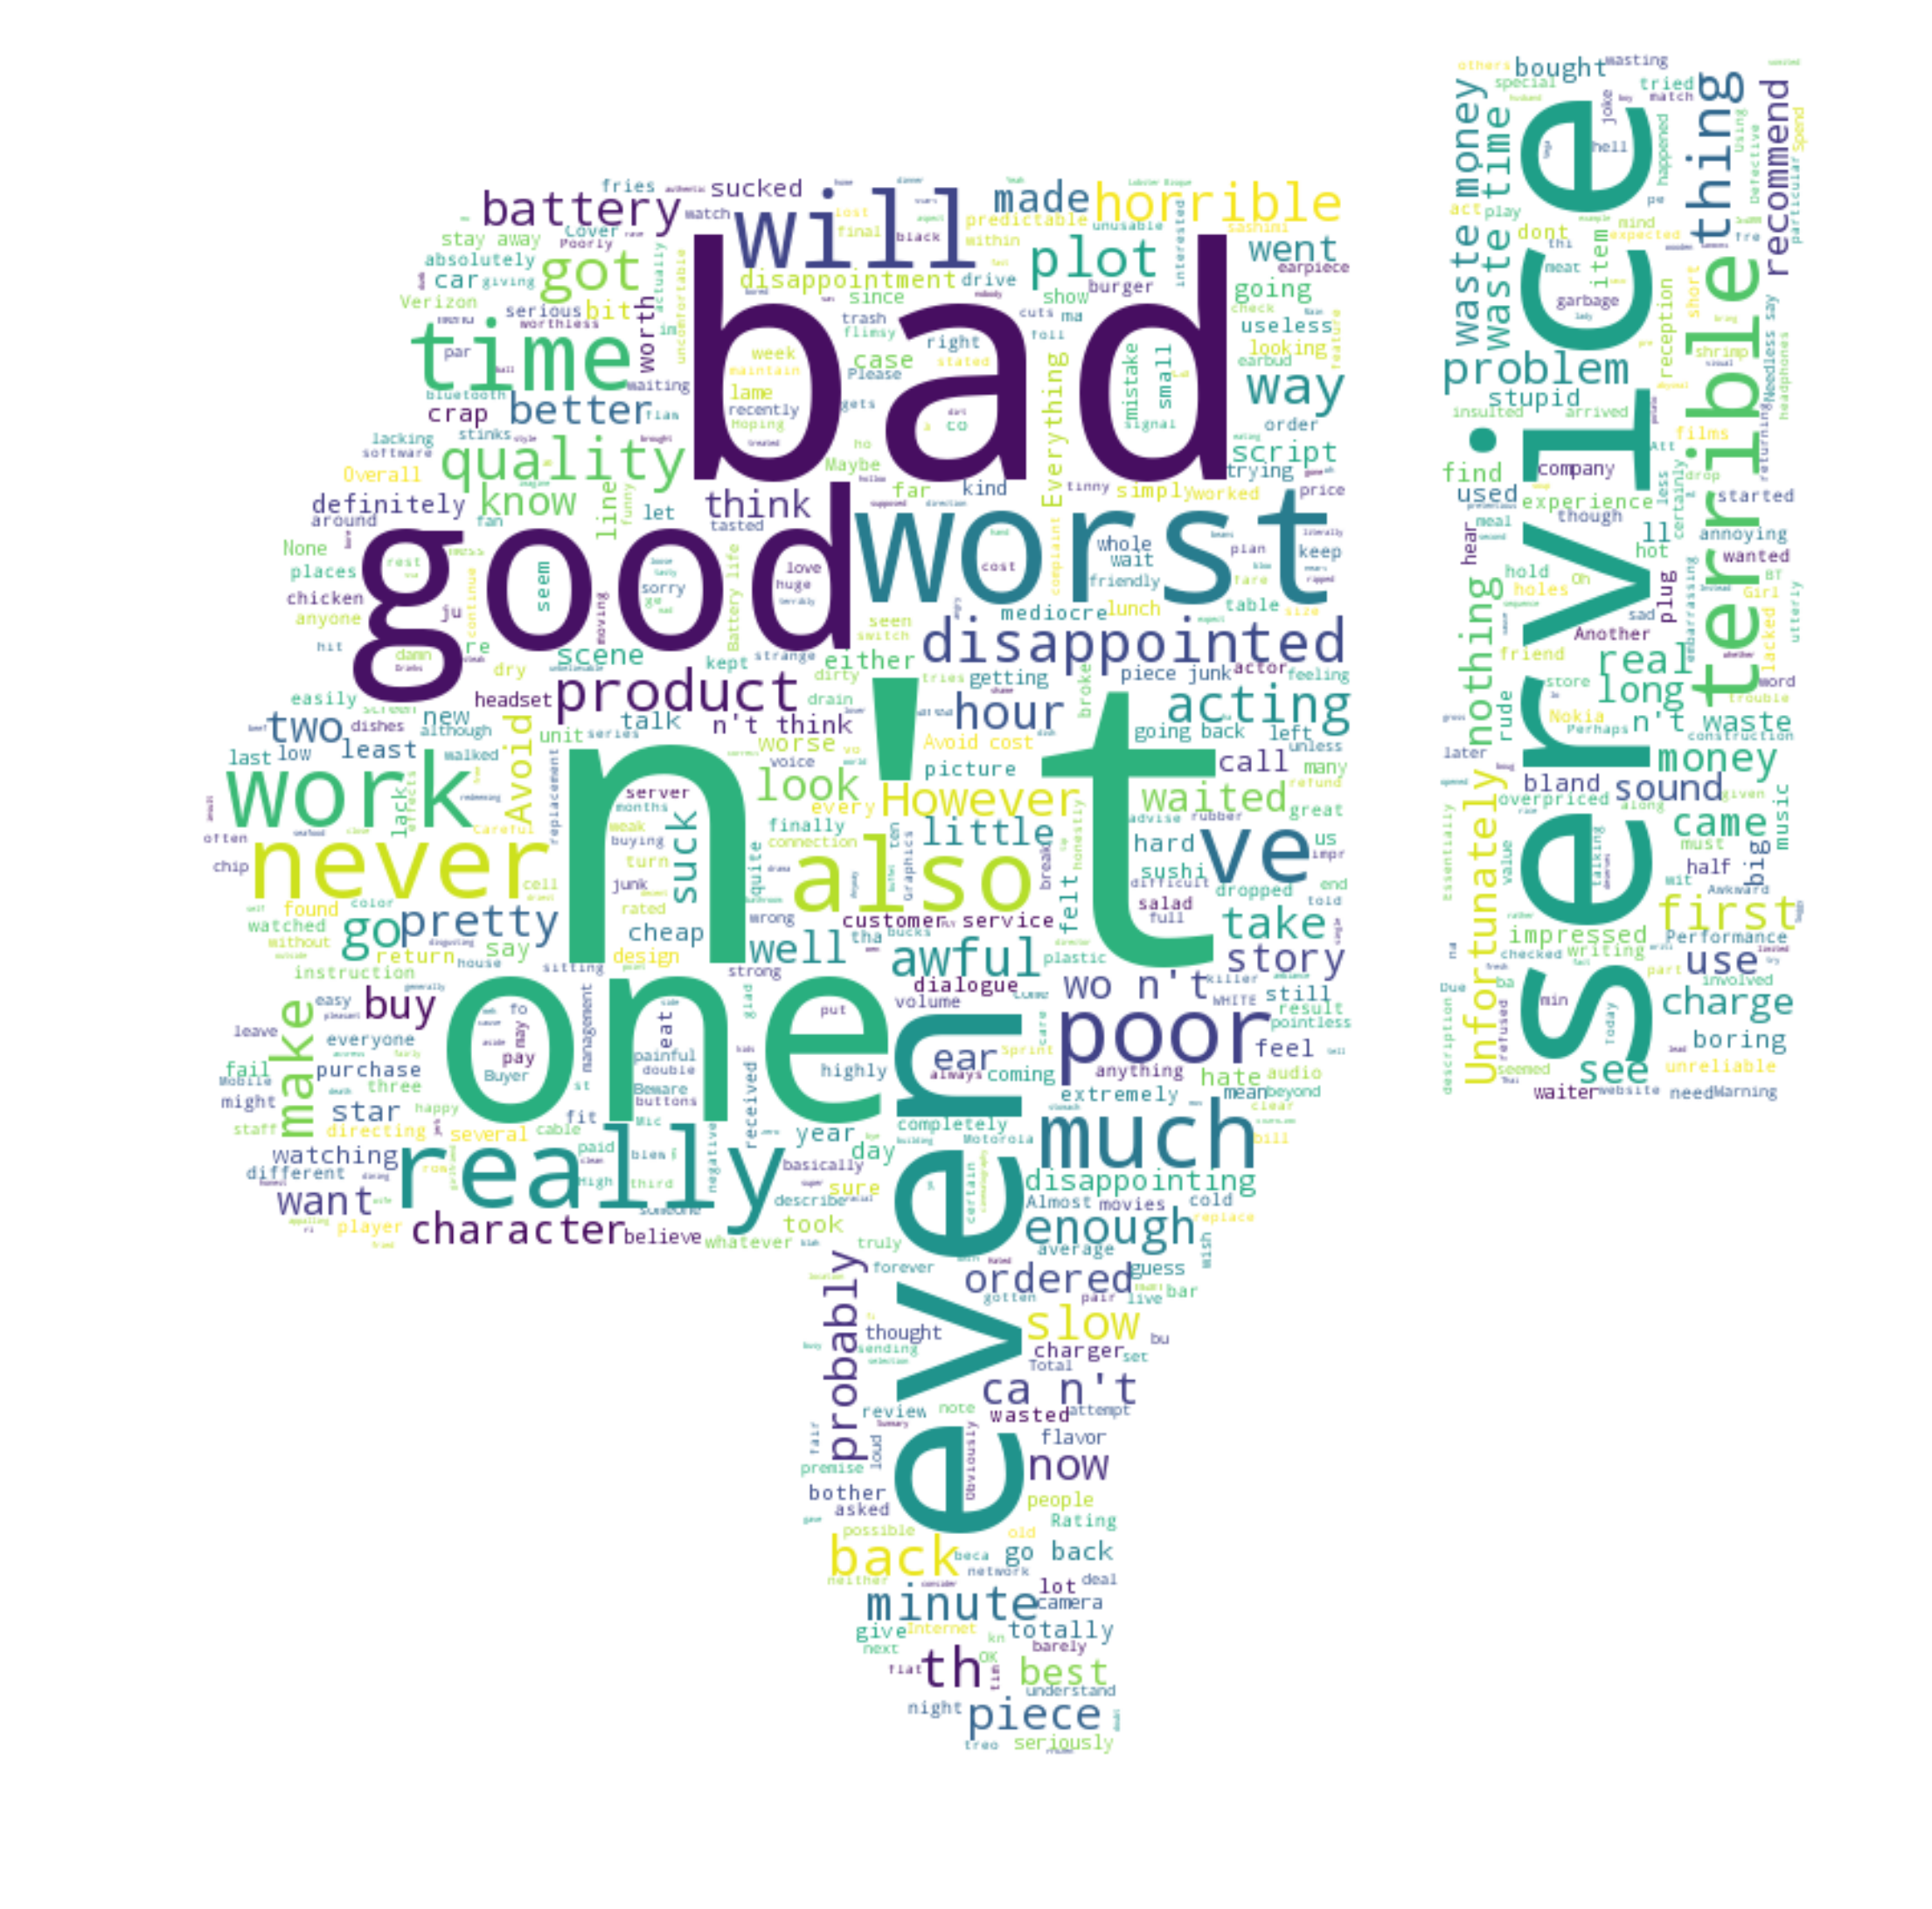

In [205]:
# Read the whole text.
text = X['unigrams'][X['score'] == 0]
# read the mask image
mask = np.array(Image.open("helpers/dislike.jpg"))
ta.plot_word_cloud_mask(text.to_string(), mask, stopwords)

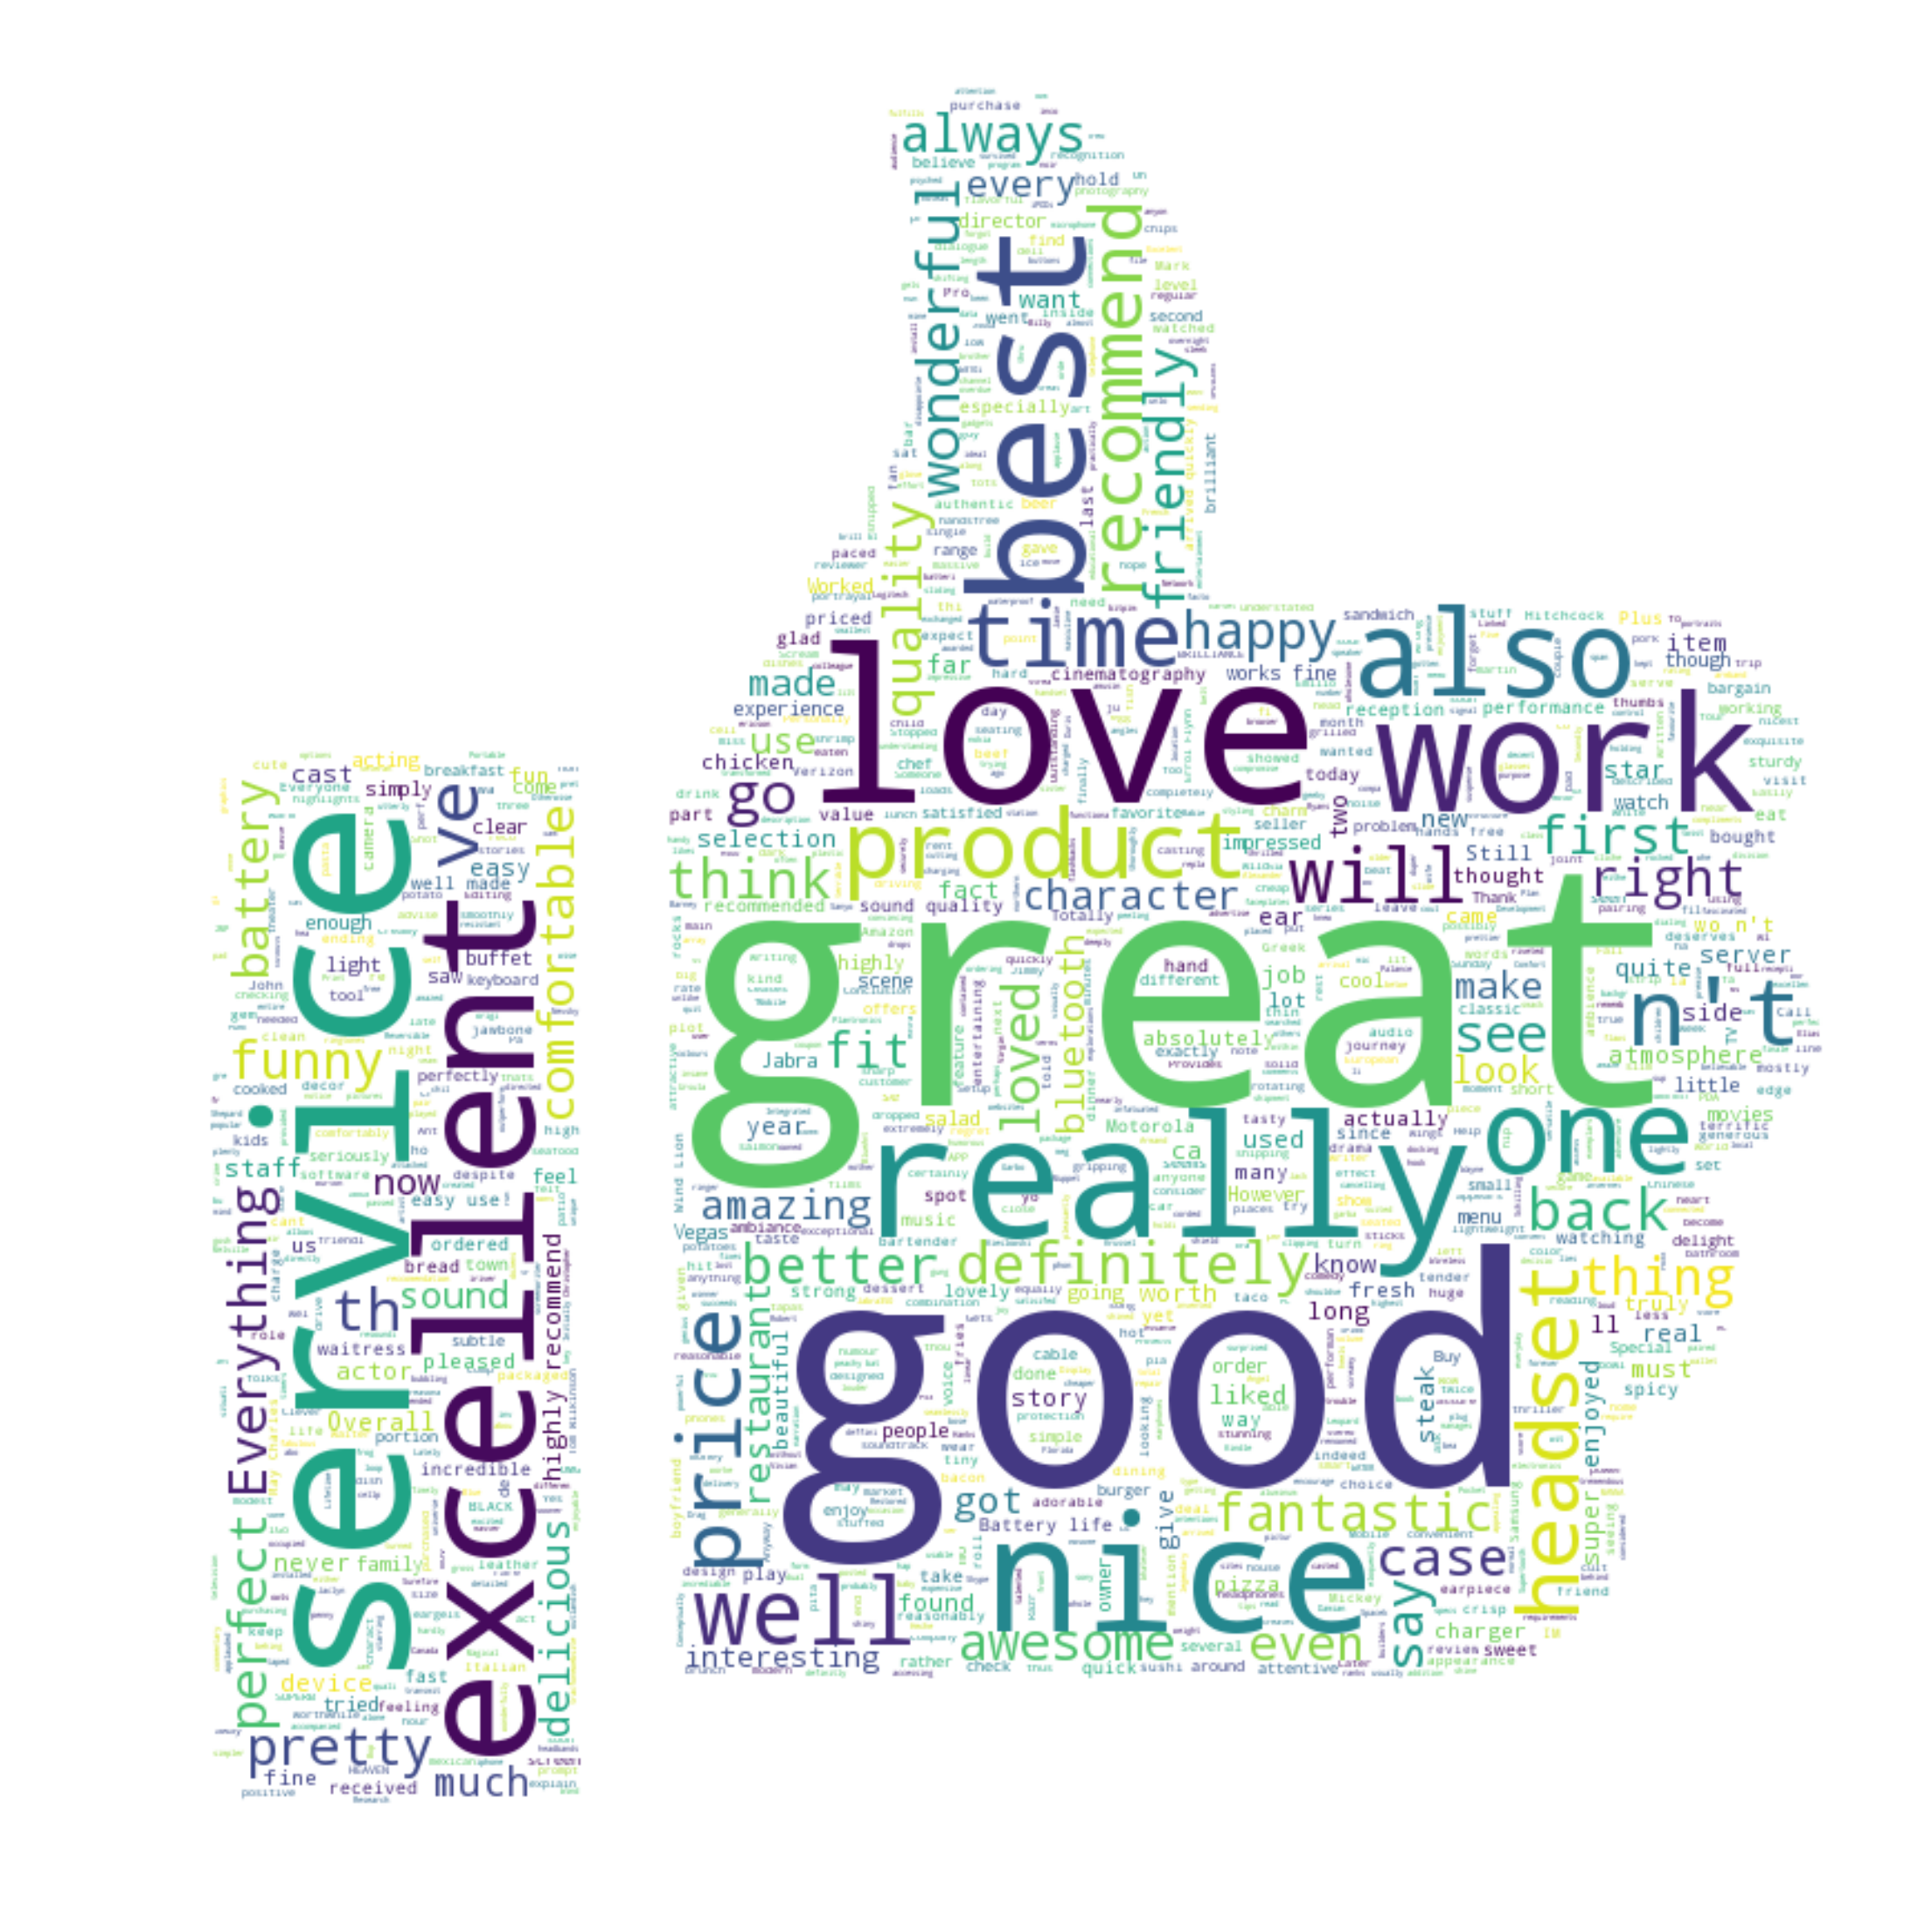

In [206]:
# Read the whole text.
text = X['unigrams'][X['score'] == 1]
# read the mask image
mask = np.array(Image.open("helpers/like.jpg"))
ta.plot_word_cloud_mask(text.to_string(), mask, stopwords)

# 5.3. Feature subset selection

 Will these two lines of code I will be able to transorm the articles into a term-document matrix.

In [99]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

In [100]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[1:7].sentence)))


['good',
 'case',
 'excellent',
 'value',
 'great',
 'for',
 'the',
 'jawbone',
 'tied',
 'to',
 'charger',
 'for',
 'conversations',
 'lasting',
 'more',
 'than',
 '45',
 'minutes',
 'major',
 'problems',
 'the',
 'mic',
 'is',
 'great',
 'have',
 'to',
 'jiggle',
 'the',
 'plug',
 'to',
 'get',
 'it',
 'to',
 'line',
 'up',
 'right',
 'to',
 'get',
 'decent',
 'volume',
 'if',
 'you',
 'have',
 'several',
 'dozen',
 'or',
 'several',
 'hundred',
 'contacts',
 'then',
 'imagine',
 'the',
 'fun',
 'of',
 'sending',
 'each',
 'of',
 'them',
 'one',
 'by',
 'one']

 We can check the shape of this matrix by:

In [101]:
X_counts.shape

(2983, 5161)

 We can obtain the feature names of the vectorizer, i.e., the terms

In [102]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In the next bit of code, we want to extract the first ten articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

In [103]:
X[0:10]

source                                           sentence  score  \
0  amazon_cells  So there is no way for me to plug it in here i...    0.0   
1  amazon_cells                        Good case, Excellent value.    1.0   
2  amazon_cells                             Great for the jawbone.    1.0   
3  amazon_cells  Tied to charger for conversations lasting more...    0.0   
4  amazon_cells                                  The mic is great.    1.0   
5  amazon_cells  I have to jiggle the plug to get it to line up...    0.0   
6  amazon_cells  If you have several dozen or several hundred c...    0.0   
7  amazon_cells        If you are Razr owner...you must have this!    1.0   
8  amazon_cells                Needless to say, I wasted my money.    0.0   
9  amazon_cells                   What a waste of money and time!.    0.0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...  
4                           [The, mic, is, great, .]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...  
6  [If, you, have, several, dozen, or, several, h...  
7  [If, you, are, Razr, owner, ..., you, must, ha...  
8    [Needless, to, say, ,, I, wasted, my, money, .]  
9       [What, a, waste, of, money, and, time, !, .]

In [104]:
X_counts[0:10].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

We can also use the vectorizer to generate word frequency vector for new documents or articles. Let us try that below:

In [105]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

Now let us put a 00 in the document to see if it is detected as we expect.


In [106]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [107]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:500]]

In [108]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:500]]

In [109]:
plot_z = X_counts[0:20, 0:500].toarray()

In [110]:
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [111]:
# to plot
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

# 5.4. Dimensionality Reduction

As discussed in the class the curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience. Therefor I am going to try to reduce the dimenionality.

In [112]:
from sklearn.decomposition import PCA

In [113]:
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

In [114]:
X_reduced.shape

(2983, 3)

In [115]:
categories

['good', 'bad']

In [116]:
trace1 = ta.get_trace(X_reduced, X["score"], 1.0, "rgb(0,255,255)") 
trace2 = ta.get_trace(X_reduced, X["score"], 0.0, "rgb(255,0,0)")

In [117]:
data = [trace1, trace2]

In [118]:
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

# 5.5. Atrribute Transformation / Aggregation

Aggregation is the process of elimination attributes, such as the type of the item, or reducing the number of values for a particular attribute. The motives to do this are: first, aggregation may permit the use of more expensive data mining algorithms, second, aggregation can act as a change  of scope or scale by providing a high-level view of the data instead of a low-level view.  

In [119]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [120]:
term_frequencies[0]

array([1])

In [121]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

Since we have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the math library provided by python and apply it to the array of values of the term frequency vector. 

In [124]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [126]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

# 5.6. Discretization and Binarization

In this section I am going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, score, into two binary attributes. In other words, we are taking the score and replacing it with a n asymmetric binary attributes. 

In [127]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [128]:
mlb = preprocessing.LabelBinarizer()

In [129]:
mlb.fit(X.score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [130]:
mlb.classes_

array([ 0.,  1.])

In [131]:
X['bin_category'] = mlb.transform(X['score']).tolist()

In [132]:
X[0:10]

source                                           sentence  score  \
0  amazon_cells  So there is no way for me to plug it in here i...    0.0   
1  amazon_cells                        Good case, Excellent value.    1.0   
2  amazon_cells                             Great for the jawbone.    1.0   
3  amazon_cells  Tied to charger for conversations lasting more...    0.0   
4  amazon_cells                                  The mic is great.    1.0   
5  amazon_cells  I have to jiggle the plug to get it to line up...    0.0   
6  amazon_cells  If you have several dozen or several hundred c...    0.0   
7  amazon_cells        If you are Razr owner...you must have this!    1.0   
8  amazon_cells                Needless to say, I wasted my money.    0.0   
9  amazon_cells                   What a waste of money and time!.    0.0   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1               [Good, case, ,, Excellent, value, .]          [1]  
2                      [Great, for, the, jawbone, .]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                           [The, mic, is, great, .]          [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...          [0]  
6  [If, you, have, several, dozen, or, several, h...          [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...          [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]          [0]  
9       [What, a, waste, of, money, and, time, !, .]          [0]

As we can see we have a new attribute called bin_category which is either 0 or 1. 